#   <h1><center> <font size="10"> SMS Spam Classifcation</center></h1></font>

**Effort By- Aakash Tiwari**

<img src="spam_img.png">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()




In [2]:
df =pd.read_csv("spamfile",sep="\t",header=None)
df

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.columns=["Target","Text"]
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Steps

1) Clean Data

2) EDA

3) Text Pre-porcessing

4) Model Building

5) Evaluation

6) Improvemrnt

7) Web-app

8) Deply on Heroku

**Converting Ham -->0 and Spam-->1 with the help of labelencoder**

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [5]:
df_ml=df.copy()
df_ml["Target"]=encoder.fit_transform(df["Target"])

In [6]:
df_ml

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


**Removing Duplicate Value**

In [7]:
df.duplicated().sum()

403

In [8]:
df_ml.drop_duplicates(keep='first')

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## Exploratory Data Analysis

In [9]:
df["Target"].value_counts()

ham     4825
spam     747
Name: Target, dtype: int64

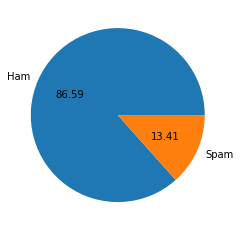

In [10]:
plt.pie(df["Target"].value_counts(),labels=["Ham","Spam"],autopct="%0.2f")
plt.show()

**In  our data, 86.58% of  messages are ham and 13.41% of messages are spam.**

**Counting Length of char in Text**

In [11]:
df_ml["len_text"]=df_ml["Text"].apply(len)

**Counting number of words in Text**

In [12]:
df_ml["num_words"]=df_ml["Text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [13]:
df_ml.sample(10)

,Target,Text,len_text,num_words
3825,0,I miss you so much I'm so desparate I have rec...,159,37
2620,1,<Forwarded from 21870000>Hi - this is your Mai...,173,32
4453,0,I've told you everything will stop. Just dont ...,69,15
3544,0,I'm e person who's doing e sms survey...,40,11
1117,0,Hey... What time is your driving on fri? We go...,69,17
2021,0,Anything lor but toa payoh got place 2 walk me...,50,11
3892,0,No problem. We will be spending a lot of quali...,65,14
264,1,Hey I am really horny want to chat or see me n...,121,25
3405,0,Then ü ask dad to pick ü up lar... Ü wan 2 sta...,62,18
3104,0,"U so lousy, run already come back then half de...",58,14


In [14]:
df_ml["num_sentences"]=df_ml["Text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [15]:
df_ml.sample(10)

,Target,Text,len_text,num_words,num_sentences
4674,0,I forgot 2 ask ü all smth.. There's a card on ...,107,30,3
5328,0,Sweet heart how are you?,24,6,1
3823,0,Just normal only here :),24,6,1
1745,1,Someone has conacted our dating service and en...,155,27,2
4972,0,Hey come online! Use msn... We are all there,44,11,2
726,0,Got it! It looks scrumptious... daddy wants to...,70,16,2
1604,0,Have you heard about that job? I'm going to th...,143,31,4
2845,0,Today iZ Yellow rose day. If u love my frndshi...,166,43,3
3984,0,Nationwide auto centre (or something like that...,83,17,2
2079,1,85233 FREE>Ringtone!Reply REAL,30,7,1


**Visualization Through Plot**

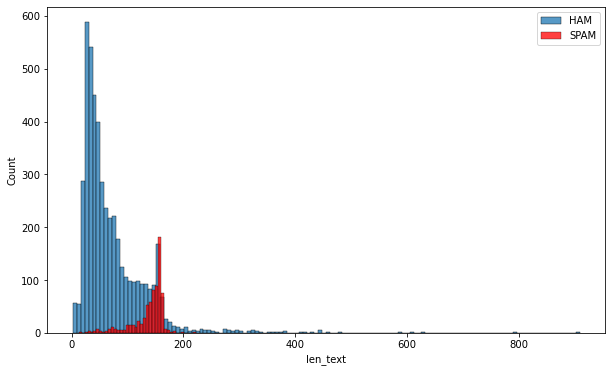

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df_ml[df_ml['Target']==0]["len_text"],label="HAM") 
sns.histplot(df_ml[df_ml['Target']==1]["len_text"],color='red',label="SPAM") 
plt.legend()
plt.show()

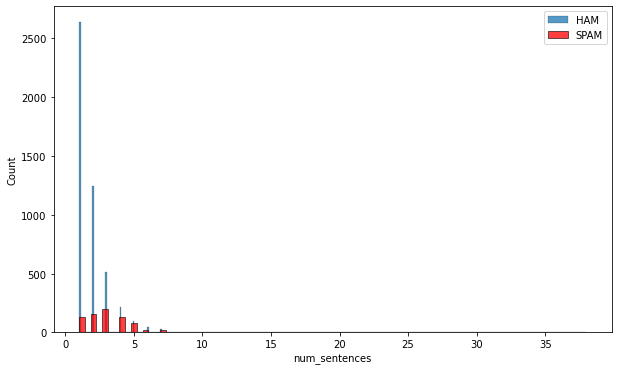

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(df_ml[df_ml['Target']==0]["num_sentences"],label="HAM") 
sns.histplot(df_ml[df_ml['Target']==1]["num_sentences"],color='red',label="SPAM") 
plt.legend()
plt.show()

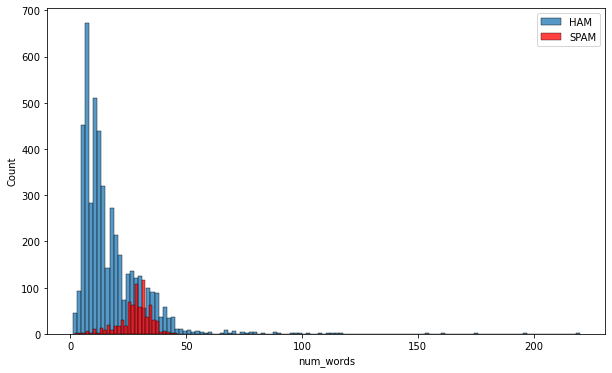

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(df_ml[df_ml['Target']==0]["num_words"],label="HAM") 
sns.histplot(df_ml[df_ml['Target']==1]["num_words"],color='red',label="SPAM") 
plt.legend()
plt.show()

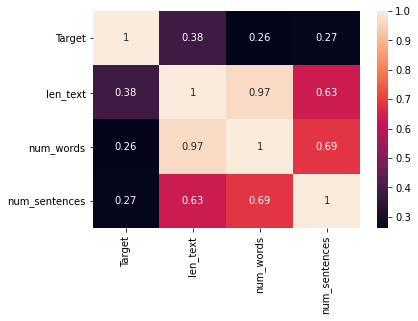

In [19]:
sns.heatmap(df_ml.corr(),annot=True)

# Text Preprocessing

1)Lower case Conversion

2)Tokenization

3)Removing Punctuations ,Special Characters

4)Removing Stop Words

5)Stemming/Lemmetization


In [20]:
def clean_text(text):
    text=text.lower()
    text =nltk.word_tokenize(text)
    y=[]
    for c in text :
        if c.isalnum():
            y.append(c)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in string.punctuation and c not in stopwords.words("english"):
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [21]:
df_ml["transformed_text"]=df_ml["Text"].apply(lambda x: clean_text(x))

In [22]:
df_ml.head()

,Target,Text,len_text,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


# Model building

**Vectorization using bag of words**

In [23]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [24]:
X=tfidf.fit_transform(df_ml["transformed_text"]).toarray()


In [25]:
X.shape

(5572, 6737)

In [26]:
Y=df_ml["Target"].values

In [27]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [28]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [29]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [30]:
gnb.fit(X_Train,Y_Train)
Y_pred1=gnb.predict(X_Test)
print(accuracy_score(Y_Test,Y_pred1))
print(confusion_matrix(Y_Test,Y_pred1))
print(precision_score(Y_Test,Y_pred1))

0.8340807174887892
[[801 156]
 [ 29 129]]
0.45263157894736844


In [46]:
mnb.fit(X_Train,Y_Train)
Y_pred2=mnb.predict(X_Test)
print(accuracy_score(Y_Test,Y_pred2))
print(confusion_matrix(Y_Test,Y_pred2))
print(precision_score(Y_Test,Y_pred2))

0.9443946188340807
[[957   0]
 [ 62  96]]
1.0


In [32]:
bnb.fit(X_Train,Y_Train)
Y_pred3=bnb.predict(X_Test)
print(accuracy_score(Y_Test,Y_pred3))
print(confusion_matrix(Y_Test,Y_pred3))
print(precision_score(Y_Test,Y_pred3))

0.9641255605381166
[[950   7]
 [ 33 125]]
0.946969696969697


**We will choose TFIDF will mnb model**

Logistic Regression.
Naïve Bayes.
Stochastic Gradient Descent.
K-Nearest Neighbours.
Decision Tree.
Random Forest.
Support Vector Machine

In [36]:
import  pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))

# Thank You.